Dec 10, 2021

Jason Cardinal Exercise Notebook Lighthouse Labs - Centroid Models

[https://data.compass.lighthouselabs.ca/days/w03d4/activities/477]

this notebook contains the code along notes

## Centroid Models Assignment

In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

**Take some time to explore the dataframe above.**

In [3]:
# Checks the first 5 rows of data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Checks the count, mean, std, min, quantiles.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checks the dtypes of the columns.
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Checks for null values and returns the sum for each column in the DataFrame.
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


In [7]:
last_two = df.iloc[:,-2:]
last_two.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


- elbow rule

In [8]:
def plot_distortion(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1, max_clusters +1), distortions)
    plt.show()

C:\Users\jason\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


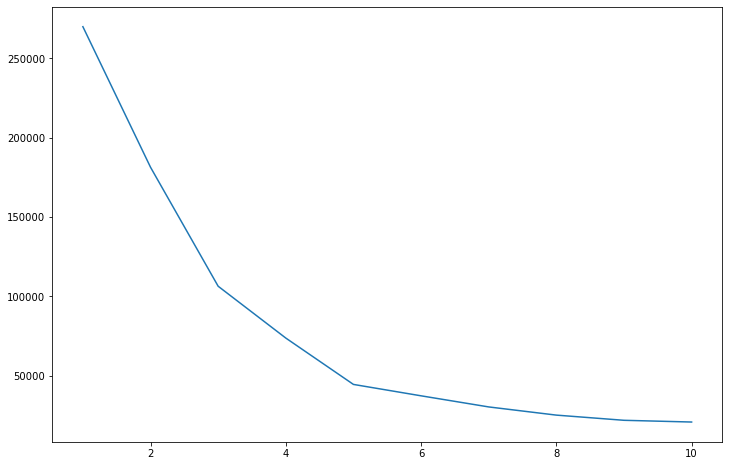

In [9]:
plot_distortion(last_two, max_clusters =10)

* fit model with optimal number of clusters

In [10]:
km = KMeans(n_clusters = 5,
            init = 'k-means++',
            n_init=10,
            random_state=0)
y_km = km.fit_predict(last_two)

* define function plot_clusters

In [11]:
def plot_clusters(X, y_km, plot_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_km):
        x = X[y_km == cluster].iloc[:,0]
        y = X[y_km == cluster].iloc[:,1]

        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    label = f'cluster {cluster}')

    if plot_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker="*",
                    s=250,
                    color='red',
                    label = 'centers')

    plt.xlabel('income')
    plt.ylabel('spending score')
    plt.show()

* plot clusters

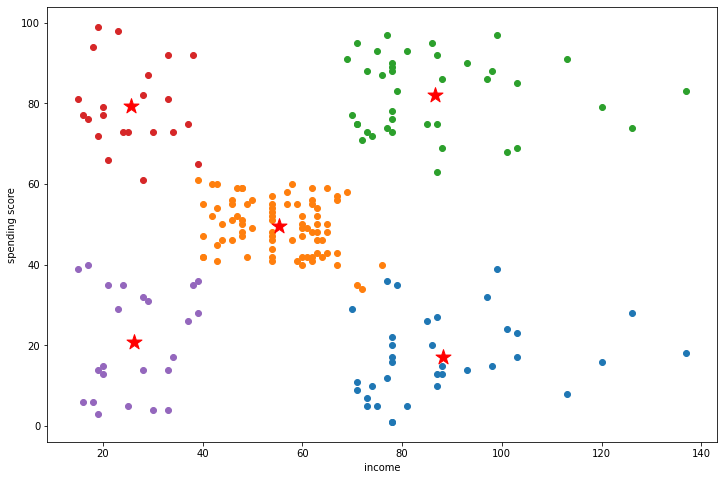

In [12]:
plot_clusters(last_two, y_km, plot_cluster_centers = True)